In [2]:
# Import Libraries


In [3]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn import tree
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 1000
sns.set_theme(style='darkgrid', palette='rainbow')
import warnings
warnings.filterwarnings('ignore')


# Classification

In [4]:
#Read the dataset


In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/aishwaryamate/Datasets/main/Mobile_price_range.csv')
df


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [6]:
df.describe()


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [7]:
df.isna().sum()


battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

<Axes: xlabel='price_range', ylabel='count'>

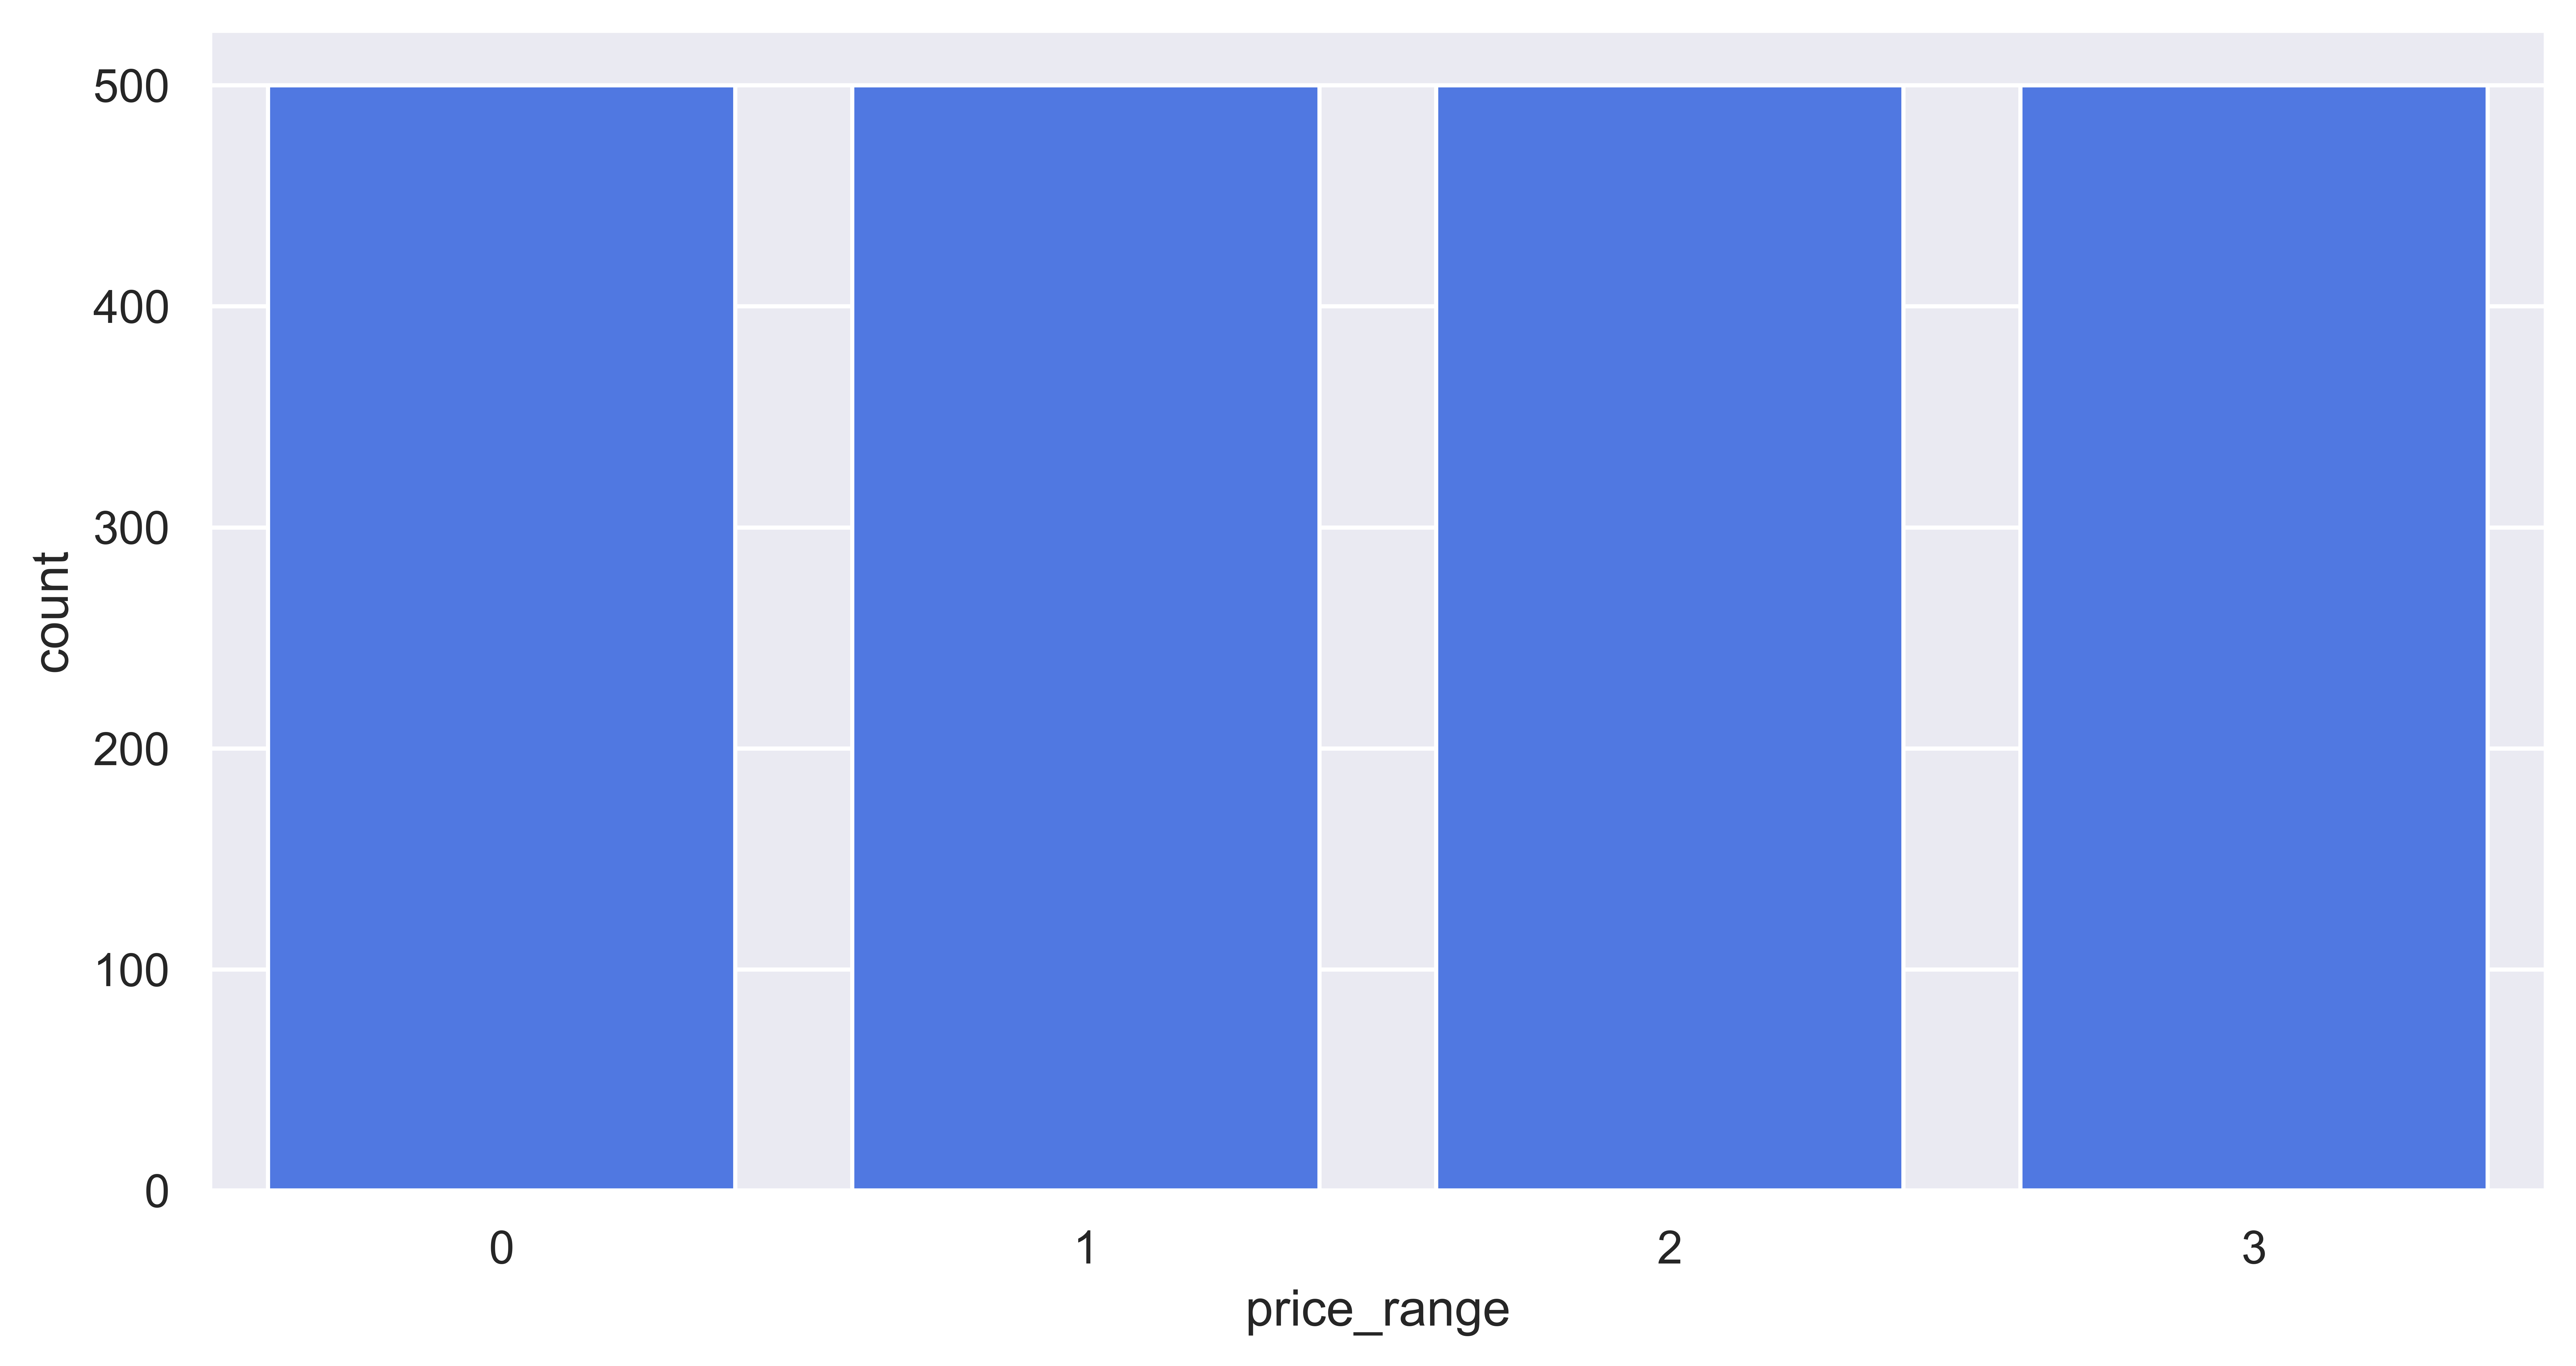

In [8]:
sns.countplot(x = df['price_range'])


In [9]:
df['price_range'].replace([0,1,2,3],['low','medium','high','very high'], inplace=True)


In [10]:
df


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,medium
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,high
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,high
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,high
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,low
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,high
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,very high
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,low


In [11]:
#Evaluate model


In [12]:
x = df.iloc[:,:-1]
y = df['price_range']


In [13]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=1)


In [ ]:
rfc = RandomForestClassifier()
rfc.fit(xtrain,ytrain)
yp = rfc.predict(xtest)
yp


array(['low', 'low', 'medium', 'low', 'high', 'medium', 'low', 'high',
       'high', 'very high', 'low', 'very high', 'medium', 'medium',
       'very high', 'low', 'low', 'medium', 'medium', 'high', 'very high',
       'very high', 'medium', 'high', 'very high', 'high', 'high',
       'very high', 'high', 'high', 'high', 'medium', 'high', 'low',
       'very high', 'very high', 'low', 'low', 'medium', 'low', 'medium',
       'low', 'high', 'medium', 'low', 'medium', 'high', 'high', 'medium',
       'high', 'high', 'very high', 'medium', 'very high', 'high',
       'very high', 'medium', 'very high', 'very high', 'medium', 'low',
       'high', 'medium', 'very high', 'high', 'medium', 'low', 'high',
       'very high', 'high', 'medium', 'high', 'low', 'very high',
       'very high', 'medium', 'high', 'medium', 'low', 'low', 'low',
       'very high', 'medium', 'high', 'very high', 'high', 'high', 'low',
       'medium', 'medium', 'very high', 'low', 'medium', 'medium', 'high',
      

In [15]:
print(classification_report(ytest,yp))


              precision    recall  f1-score   support

        high       0.82      0.85      0.83       106
         low       0.90      0.92      0.91        92
      medium       0.79      0.84      0.82        96
   very high       0.98      0.87      0.92       106

    accuracy                           0.87       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.87      0.87      0.87       400



In [16]:
rfc.estimators_[0]


DecisionTreeClassifier(max_features='sqrt', random_state=1827988771)

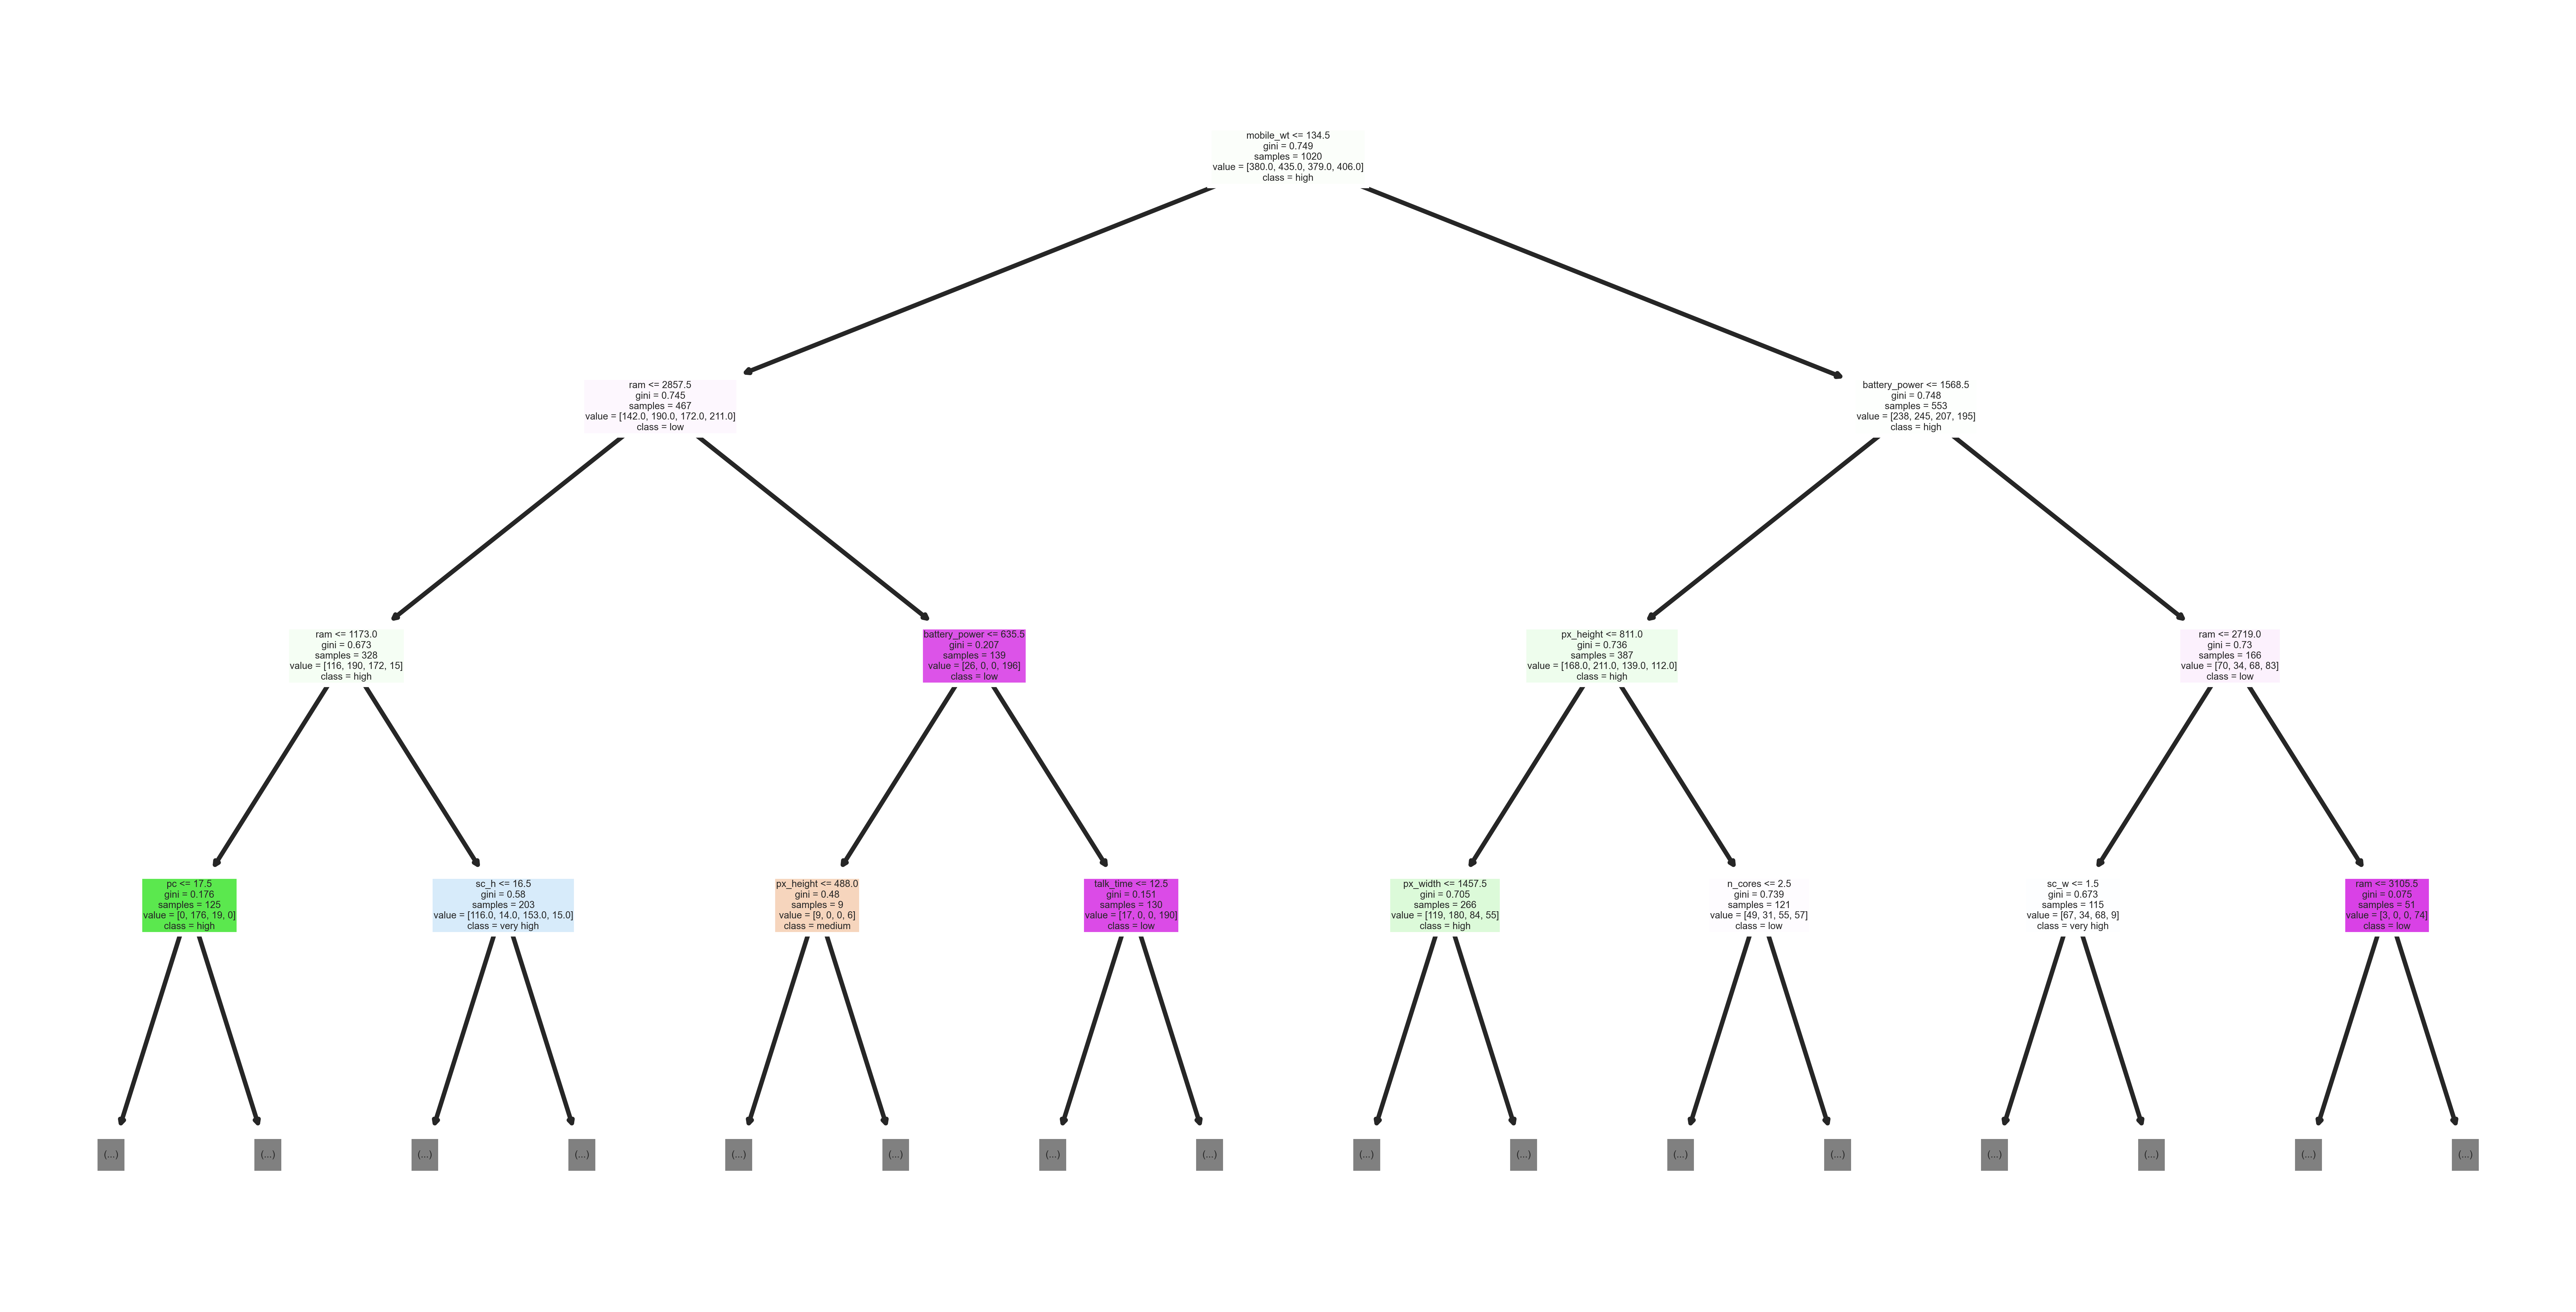

In [17]:
tree.plot_tree(rfc.estimators_[0], feature_names = x.columns, filled = True, class_names = df['price_range'].unique(), max_depth = 3)
plt.show()


In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x = sc.fit_transform(x)
pd.DataFrame(x).describe()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03
mean,2.149392e-16,-1.243450e-17,-1.545430e-16,8.082424e-17,5.861978e-17,1.048051e-16,-9.592327e-17,-1.030287e-16,1.278977e-16,-7.727152e-17,1.403322e-16,1.181277e-16,6.084022e-17,-1.811884e-16,4.884981e-17,-5.506706e-17,1.421085e-16,1.421085e-17,-5.417888e-17,1.421085e-17
std,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00
min,-1.678817e+00,-9.900495e-01,-1.253064e+00,-1.019184e+00,-9.928904e-01,-1.043966e+00,-1.656260e+00,-1.393304e+00,-1.702391e+00,-1.539175e+00,-1.635631e+00,-1.454027e+00,-1.739251e+00,-1.722711e+00,-1.734608e+00,-1.324131e+00,-1.649584e+00,-1.786861e+00,-1.006018e+00,-1.014099e+00
25%,-8.804033e-01,-9.900495e-01,-1.007906e+00,-1.019184e+00,-7.624947e-01,-1.043966e+00,-8.845346e-01,-1.046495e+00,-8.829695e-01,-6.647678e-01,-8.109291e-01,-8.167289e-01,-8.719579e-01,-8.453168e-01,-7.849833e-01,-8.649215e-01,-9.173306e-01,5.596406e-01,-1.006018e+00,-1.014099e+00
50%,-2.849593e-02,-9.900495e-01,-2.727384e-02,9.811771e-01,-3.017032e-01,9.578860e-01,-2.563229e-03,-6.069151e-03,2.122020e-02,-2.275644e-01,1.377252e-02,-1.828116e-01,-1.045034e-02,2.055123e-02,-7.276497e-02,-1.761069e-01,-2.013697e-03,5.596406e-01,9.940179e-01,9.860966e-01
75%,8.575560e-01,1.010051e+00,8.307794e-01,9.811771e-01,6.198797e-01,9.578860e-01,8.794082e-01,1.034357e+00,8.406421e-01,1.084046e+00,8.384742e-01,6.810064e-01,8.828792e-01,8.670548e-01,8.768595e-01,7.423125e-01,9.133032e-01,5.596406e-01,9.940179e-01,9.860966e-01
max,1.728812e+00,1.010051e+00,1.811412e+00,9.811771e-01,3.384628e+00,9.578860e-01,1.761380e+00,1.727974e+00,1.688320e+00,1.521249e+00,1.663176e+00,2.963672e+00,1.727608e+00,1.727851e+00,1.589078e+00,2.808756e+00,1.645557e+00,5.596406e-01,9.940179e-01,9.860966e-01


In [19]:
from sklearn.decomposition import PCA
pca = PCA()
pcs = pca.fit_transform(x)


In [20]:
pca.explained_variance_ratio_


array([0.08386288, 0.08112475, 0.07912854, 0.07145225, 0.05607555,
       0.05435682, 0.05328221, 0.05102092, 0.05085209, 0.05028427,
       0.04903619, 0.0487416 , 0.04761192, 0.04758246, 0.04494168,
       0.04380595, 0.02504022, 0.02361498, 0.02064192, 0.0175428 ])

In [21]:
pd.DataFrame(pcs)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.323497,-2.616894,-0.587733,1.255776,-0.434201,-1.027357,1.875229,-0.016013,-0.976154,1.418092,0.496226,-0.929405,-0.204771,0.676215,1.052378,-1.715250,-0.695525,-0.267118,-0.676584,-0.389776
1,-1.998340,0.572836,0.344679,-1.113777,0.573443,1.250394,-0.438609,-0.075111,-0.315092,-1.029457,-1.301769,0.519323,0.723118,1.061393,-1.198784,0.422644,0.513952,1.391796,-0.039669,0.017731
2,-1.301465,0.190101,0.085441,-1.976486,0.610520,0.688337,-1.180301,-0.529955,-1.130957,-1.377908,-1.470089,0.018760,0.487706,1.377705,-0.640987,-0.011965,0.494988,-0.029530,-0.120736,-0.193362
3,-1.149410,-0.274381,1.666841,-0.234412,-0.550274,0.229234,-0.915311,0.629011,-1.605108,-1.192263,0.935184,-0.243802,-0.801150,0.194903,0.329372,-2.044077,0.299631,0.121473,1.145121,0.658656
4,1.636494,1.291291,-0.296079,-1.831218,-1.755646,1.063599,-0.165076,0.579110,0.973719,-0.081522,-0.670432,0.427740,1.231384,0.151592,-0.849615,-0.149835,0.284135,-0.869954,-0.118172,-0.860269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-0.903997,0.581778,0.652711,-1.878627,-0.899261,-0.744025,-1.940337,-1.166270,-1.073436,-0.768855,-0.977365,2.095601,0.858294,0.768829,0.815784,-0.641351,0.391222,0.359362,-0.246019,1.001867
1996,-1.445462,-0.839583,1.169373,-0.737419,-0.138226,0.811833,-0.449874,1.521525,-0.126258,2.626154,-0.222404,0.033723,0.892308,-0.751803,0.365753,0.992795,-1.192649,0.201205,1.145837,0.102026
1997,-1.255341,-0.166033,-0.747082,-2.030030,-0.079002,0.357773,-0.856139,-0.832216,-0.043710,-0.338712,-0.070688,0.708036,-1.920152,-0.093934,-1.375636,2.017672,0.210182,0.250192,-0.214238,-0.422179
1998,-1.223994,0.950094,-0.800276,1.597982,-1.482435,-1.088828,0.305212,-0.798220,1.643557,1.338114,0.126544,-0.604027,1.287704,-0.061416,0.561876,0.924178,0.398357,-0.185215,-0.304207,-0.534405


In [22]:
np.cumsum(pca.explained_variance_ratio_)


array([0.08386288, 0.16498763, 0.24411617, 0.31556842, 0.37164398,
       0.42600079, 0.47928301, 0.53030392, 0.58115601, 0.63144028,
       0.68047647, 0.72921807, 0.77682999, 0.82441245, 0.86935413,
       0.91316009, 0.9382003 , 0.96181529, 0.9824572 , 1.        ])

Text(0.5, 1.0, 'Scree Plot')

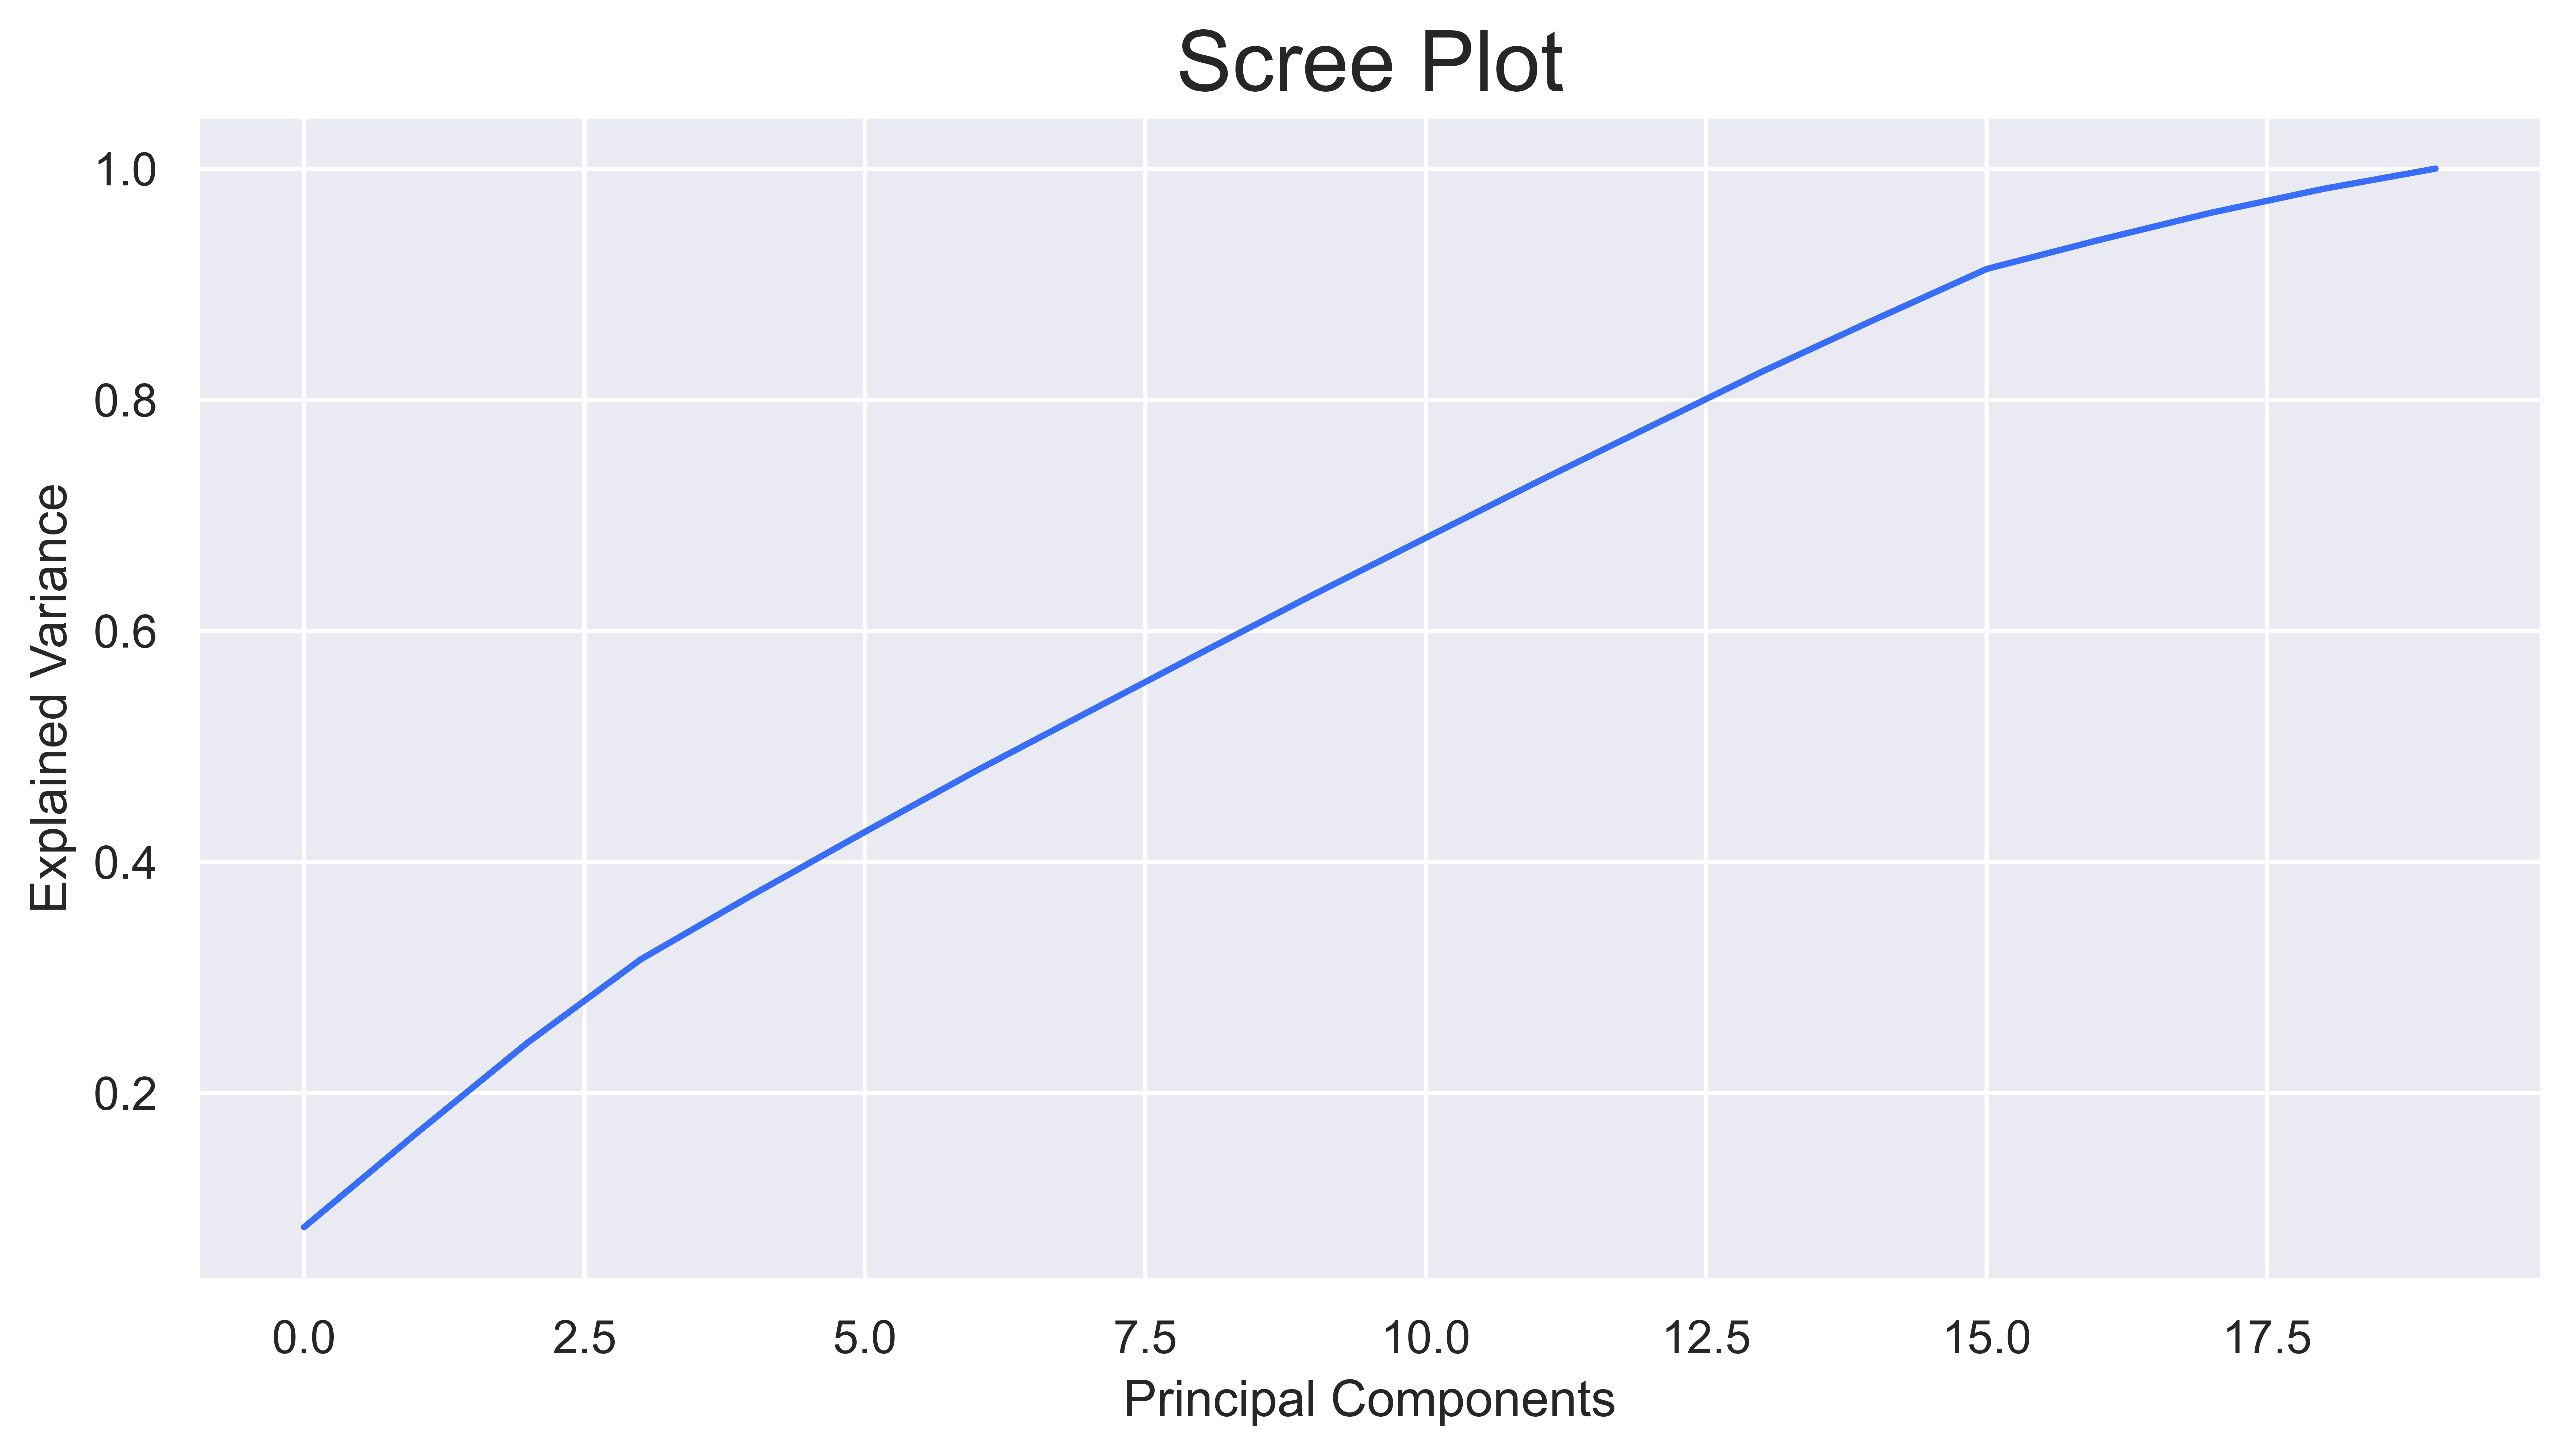

In [23]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.title('Scree Plot', size = 20)


In [24]:
pca = PCA(n_components=15)
pcs = pca.fit_transform(x)
pcs


array([[ 0.32349681, -2.61689384, -0.58773344, ..., -0.20477065,
         0.67621547,  1.05237814],
       [-1.99834007,  0.57283586,  0.34467906, ...,  0.72311824,
         1.06139291, -1.19878351],
       [-1.30146542,  0.19010079,  0.08544072, ...,  0.48770589,
         1.37770516, -0.6409868 ],
       ...,
       [-1.25534097, -0.16603296, -0.74708239, ..., -1.92015202,
        -0.09393398, -1.37563618],
       [-1.22399354,  0.95009442, -0.80027601, ...,  1.28770429,
        -0.06141571,  0.56187604],
       [ 0.01819746,  1.4620912 , -0.6055566 , ..., -1.00978034,
         0.73868574, -0.06986286]])

In [ ]:
data = pd.DataFrame(pcs,columns=[f"PC{i}" for i in range(1,16)])
data


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
0,0.323497,-2.616894,-0.587733,1.255776,-0.434201,-1.027357,1.875229,-0.016013,-0.976154,1.418092,0.496226,-0.929405,-0.204771,0.676215,1.052378
1,-1.998340,0.572836,0.344679,-1.113777,0.573443,1.250394,-0.438609,-0.075111,-0.315092,-1.029457,-1.301769,0.519323,0.723118,1.061393,-1.198784
2,-1.301465,0.190101,0.085441,-1.976486,0.610520,0.688337,-1.180301,-0.529955,-1.130957,-1.377908,-1.470089,0.018760,0.487706,1.377705,-0.640987
3,-1.149410,-0.274381,1.666841,-0.234412,-0.550274,0.229234,-0.915311,0.629011,-1.605108,-1.192263,0.935184,-0.243802,-0.801150,0.194903,0.329372
4,1.636494,1.291291,-0.296079,-1.831218,-1.755646,1.063599,-0.165076,0.579110,0.973719,-0.081522,-0.670432,0.427740,1.231384,0.151592,-0.849615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-0.903997,0.581778,0.652711,-1.878627,-0.899261,-0.744025,-1.940337,-1.166270,-1.073436,-0.768855,-0.977365,2.095601,0.858294,0.768829,0.815784
1996,-1.445462,-0.839583,1.169373,-0.737419,-0.138226,0.811833,-0.449874,1.521525,-0.126258,2.626154,-0.222404,0.033723,0.892308,-0.751803,0.365753
1997,-1.255341,-0.166033,-0.747082,-2.030030,-0.079002,0.357773,-0.856139,-0.832216,-0.043710,-0.338712,-0.070688,0.708036,-1.920152,-0.093934,-1.375636
1998,-1.223994,0.950094,-0.800276,1.597982,-1.482435,-1.088828,0.305212,-0.798220,1.643557,1.338114,0.126544,-0.604027,1.287704,-0.061416,0.561876


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load iris dataset
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Define hyperparameter tuning space
param_grid = {
    'n_estimators': [200, 300,400],
    'max_depth': [3, 5,7]
}

# Initialize RandomForestClassifier
rf = RandomForestClassifier(random_state=1)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, verbose=1)

# Perform grid search
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

# Evaluate model on test set
print("Test Score: ", grid_search.score(X_test, y_test))


Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Parameters:  {'max_depth': 7, 'n_estimators': 300}
Best Score:  0.6464285714285715
Test Score:  0.6383333333333333


In [ ]:
rfc = RandomForestClassifier( max_depth= 15, n_estimators=300)
rfc.fit(xtrain,ytrain)
yp = rfc.predict(xtest)
yp


array(['low', 'low', 'medium', 'low', 'very high', 'medium', 'low',
       'high', 'high', 'very high', 'low', 'very high', 'medium',
       'medium', 'very high', 'low', 'low', 'medium', 'medium', 'high',
       'very high', 'very high', 'medium', 'high', 'very high', 'high',
       'high', 'very high', 'high', 'high', 'high', 'medium', 'high',
       'low', 'very high', 'very high', 'low', 'low', 'medium', 'low',
       'medium', 'low', 'high', 'medium', 'low', 'medium', 'high', 'high',
       'medium', 'high', 'high', 'very high', 'medium', 'very high',
       'high', 'very high', 'medium', 'very high', 'very high', 'medium',
       'low', 'high', 'medium', 'very high', 'high', 'high', 'low',
       'high', 'very high', 'high', 'medium', 'high', 'low', 'very high',
       'very high', 'medium', 'high', 'medium', 'low', 'low', 'low',
       'very high', 'medium', 'high', 'very high', 'high', 'high', 'low',
       'high', 'medium', 'very high', 'low', 'medium', 'medium', 'high',
     

In [ ]:
print(classification_report(ytest,yp))


              precision    recall  f1-score   support

        high       0.79      0.84      0.82       106
         low       0.91      0.95      0.93        92
      medium       0.81      0.81      0.81        96
   very high       0.96      0.87      0.91       106

    accuracy                           0.86       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.87      0.86      0.87       400

